# Simulation 3C

In this simulation we assess the **sensitivity** of the *RC direct methods* using a parametric variant of the football example with data matrices ($P_1(i,j,\epsilon), P_2$) and a fixed perturbation $\epsilon$.

### Importing Libraries

Importing standard libraries and the following modules:
- *datagenerator.py*: containing data sources;
- *normalizationlib.py*: containing functions to perform normalizations;
- *aggregationlib.py*: containing functions to perform aggregation;
- *exploitationlib.py*: containing functions to perform exploitation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import datagenerator as data
import normalizationlib as norm
import exploitationlib as expl

import joblib

# Football Example

We consider four team (Tunisia, Malta, Brazil, Argentina). The starting preferences of the two experts are: 
- Tunisia and Malta are weak teams;
- Brazil and Argentina are strong teams;
- Brazil beats Tunisia and Malta moderately;
- Argentina beats Tunisia and Malta largely;
- Brazil beats Argentina narrowly.

At each iteration, we will apply the perturbation $\epsilon$ to an entry of the first expert.

### Defining the GDM method

In [2]:
def RC(S):
    r = expl.RCT_3D(S)
    return r[:,0]

### Defining the parameters
We define the fixed perturbation $\epsilon=0.001$.

In [3]:
epsilon = 0.001

### Running the simulations

In [4]:
P,labels = data.get_PREF_tensor_footballP3(0,0,0)
S = norm.centrality_tensor(P)
unperturbed = RC(S)

perturbed = {}

n_choices = 4
for i in range(n_choices):
    for j in range(n_choices):
        if(i!=j):
            P,labels = data.get_PREF_tensor_footballP3(i,j,epsilon)
            S = norm.centrality_tensor(P)
            perturbed['{0},{1}'.format(i,j)] = RC(S)   

In [5]:
unperturbed

array([0.09931197, 0.06782959, 0.37320175, 0.45965668])

In [6]:
joblib.dump(unperturbed, 'unperturbed.pkl')

['unperturbed.pkl']

In [7]:
perturbed

{'0,1': array([0.09937673, 0.06776797, 0.37320007, 0.45965523]),
 '0,2': array([0.0995111 , 0.06783501, 0.37291693, 0.45973696]),
 '0,3': array([0.09959183, 0.06787407, 0.37323457, 0.45929953]),
 '1,0': array([0.09924722, 0.06789121, 0.37320344, 0.45965813]),
 '1,2': array([0.09932699, 0.06799722, 0.37294036, 0.45973544]),
 '1,3': array([0.09937172, 0.068066  , 0.37323804, 0.45932425]),
 '2,0': array([0.09911277, 0.06782417, 0.37348668, 0.45957638]),
 '2,1': array([0.09929695, 0.0676619 , 0.37346326, 0.45957789]),
 '2,3': array([0.09937795, 0.06788631, 0.3737527 , 0.45898304]),
 '3,0': array([0.09903204, 0.06778511, 0.37316892, 0.46001393]),
 '3,1': array([0.09925221, 0.0675931 , 0.37316545, 0.45998924]),
 '3,2': array([0.09924598, 0.06777286, 0.37265064, 0.46033052])}

In [8]:
joblib.dump(unperturbed, 'perturbed.pkl')

['perturbed.pkl']

Text(0, 0.5, 'L2-norm')

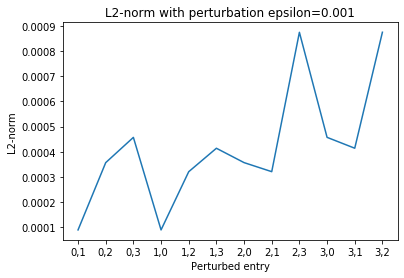

In [9]:
labels = []
norms = []

for k,v in perturbed.items():
    labels.append(k)
    norms.append(np.linalg.norm(unperturbed-v))
    
plt.plot(range(len(norms)),norms)
plt.xticks(ticks=range(len(norms)),labels=labels)
plt.title('L2-norm with perturbation epsilon=0.001')
plt.xlabel('Perturbed entry')
plt.ylabel('L2-norm')